# Simple MNIST convnet

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2015/06/19<br>
**Last modified:** 2020/04/21<br>
**Description:** A simple convnet that achieves ~99% test accuracy on MNIST.

## Setup

In [7]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import plot_model

## Prepare the data

In [8]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the model

In [9]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dropout_1 (Dropout)         (None, 5408)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
__________________________________________________

In [11]:
plot_model(model, "model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Train the model

In [12]:
batch_size = 128
epochs = 5 # Also try 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5


2023-04-20 13:38:40.136041: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


422/422 [==============================] - 4s 10ms/step - loss: 0.4300 - accuracy: 0.8798 - val_loss: 0.1698 - val_accuracy: 0.9528
Epoch 2/5
422/422 [==============================] - 4s 10ms/step - loss: 0.1936 - accuracy: 0.9432 - val_loss: 0.1121 - val_accuracy: 0.9730
Epoch 3/5
422/422 [==============================] - 4s 10ms/step - loss: 0.1424 - accuracy: 0.9571 - val_loss: 0.0875 - val_accuracy: 0.9765
Epoch 4/5
422/422 [==============================] - 4s 11ms/step - loss: 0.1215 - accuracy: 0.9636 - val_loss: 0.0751 - val_accuracy: 0.9823
Epoch 5/5
422/422 [==============================] - 5s 11ms/step - loss: 0.1077 - accuracy: 0.9674 - val_loss: 0.0700 - val_accuracy: 0.9822


## Evaluate the trained model

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.07084915041923523
Test accuracy: 0.9783999919891357


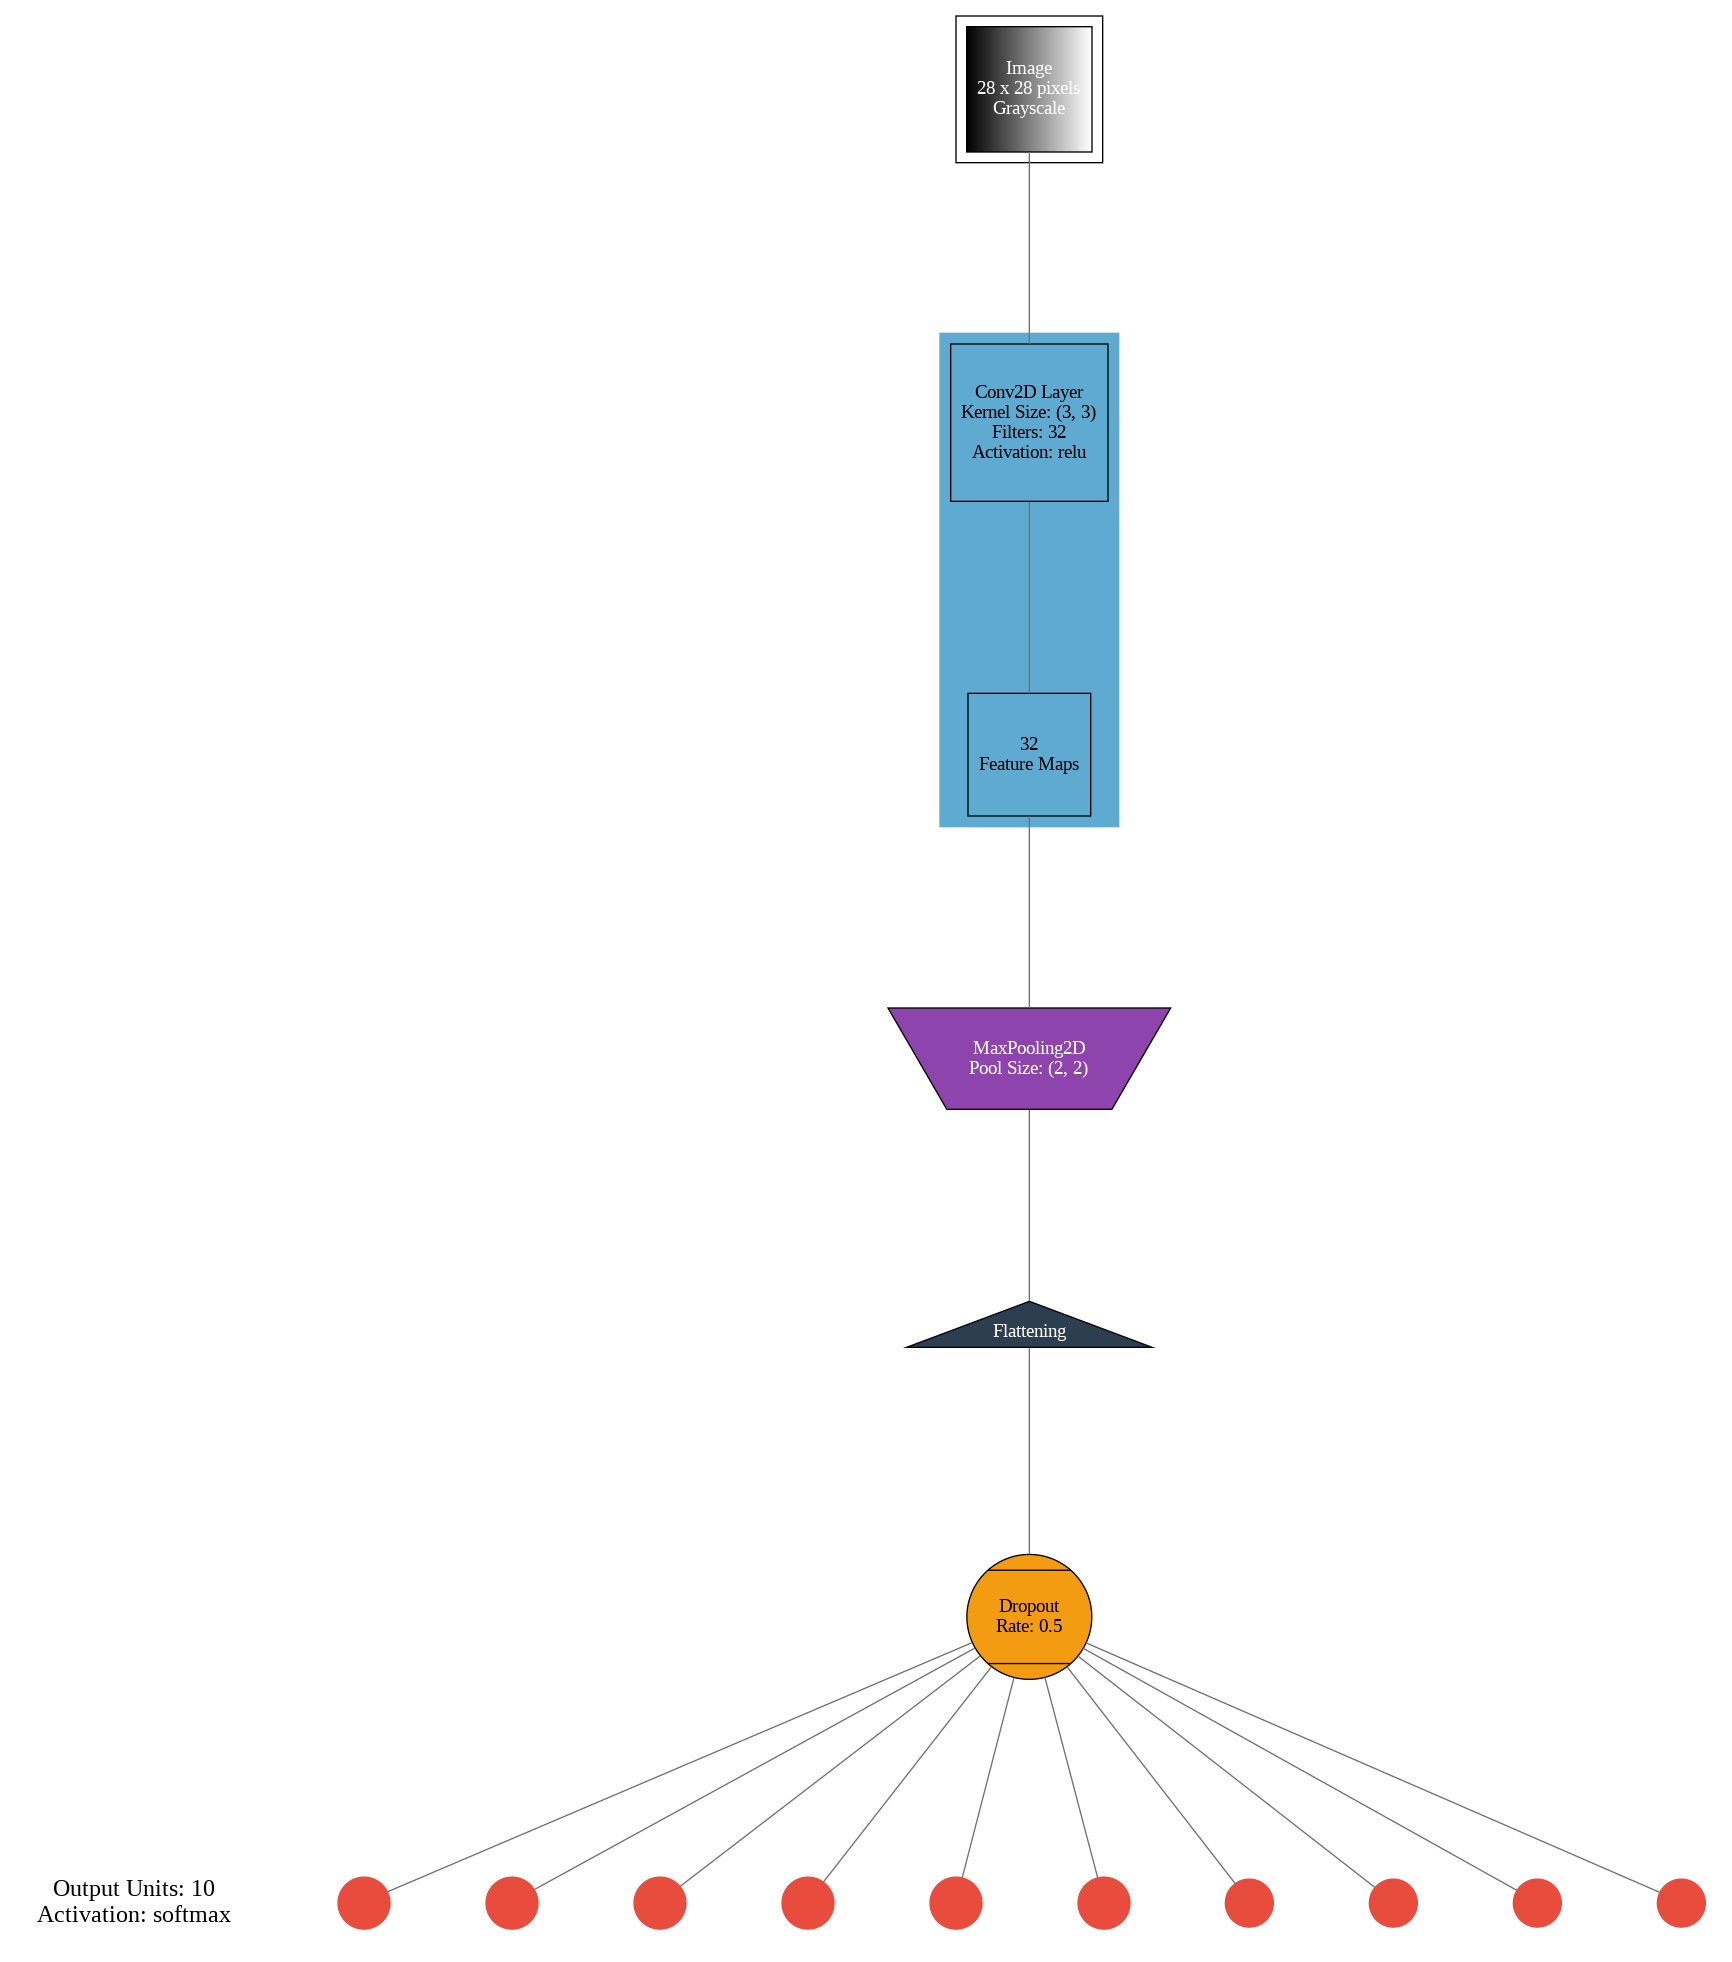

In [ ]:
from keras_visualizer import visualizer
from IPython.display import Image

visualizer(model, 
	file_name="model", 
	file_format='png')
Image("model.png")# Visualizing the network

In [14]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

In [18]:
plot_model(model, "model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [21]:
batch_size = 128
epochs = 15 # Also try 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 7s 17ms/step - loss: 0.0560 - accuracy: 0.9826 - val_loss: 0.0390 - val_accuracy: 0.9890
Epoch 2/15
422/422 [==============================] - 7s 17ms/step - loss: 0.0512 - accuracy: 0.9837 - val_loss: 0.0331 - val_accuracy: 0.9910
Epoch 3/15
422/422 [==============================] - 7s 17ms/step - loss: 0.0474 - accuracy: 0.9851 - val_loss: 0.0323 - val_accuracy: 0.9910
Epoch 4/15
422/422 [==============================] - 7s 17ms/step - loss: 0.0434 - accuracy: 0.9854 - val_loss: 0.0346 - val_accuracy: 0.9907
Epoch 5/15
422/422 [==============================] - 7s 17ms/step - loss: 0.0386 - accuracy: 0.9874 - val_loss: 0.0324 - val_accuracy: 0.9915
Epoch 6/15
422/422 [==============================] - 7s 17ms/step - loss: 0.0382 - accuracy: 0.9877 - val_loss: 0.0311 - val_accuracy: 0.9908
Epoch 7/15
422/422 [==============================] - 7s 17ms/step - loss: 0.0359 - accuracy: 0.9884 - val_loss: 0.0309 - val_accuracy: 0.9927

In [22]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.022415248677134514
Test accuracy: 0.9919999837875366


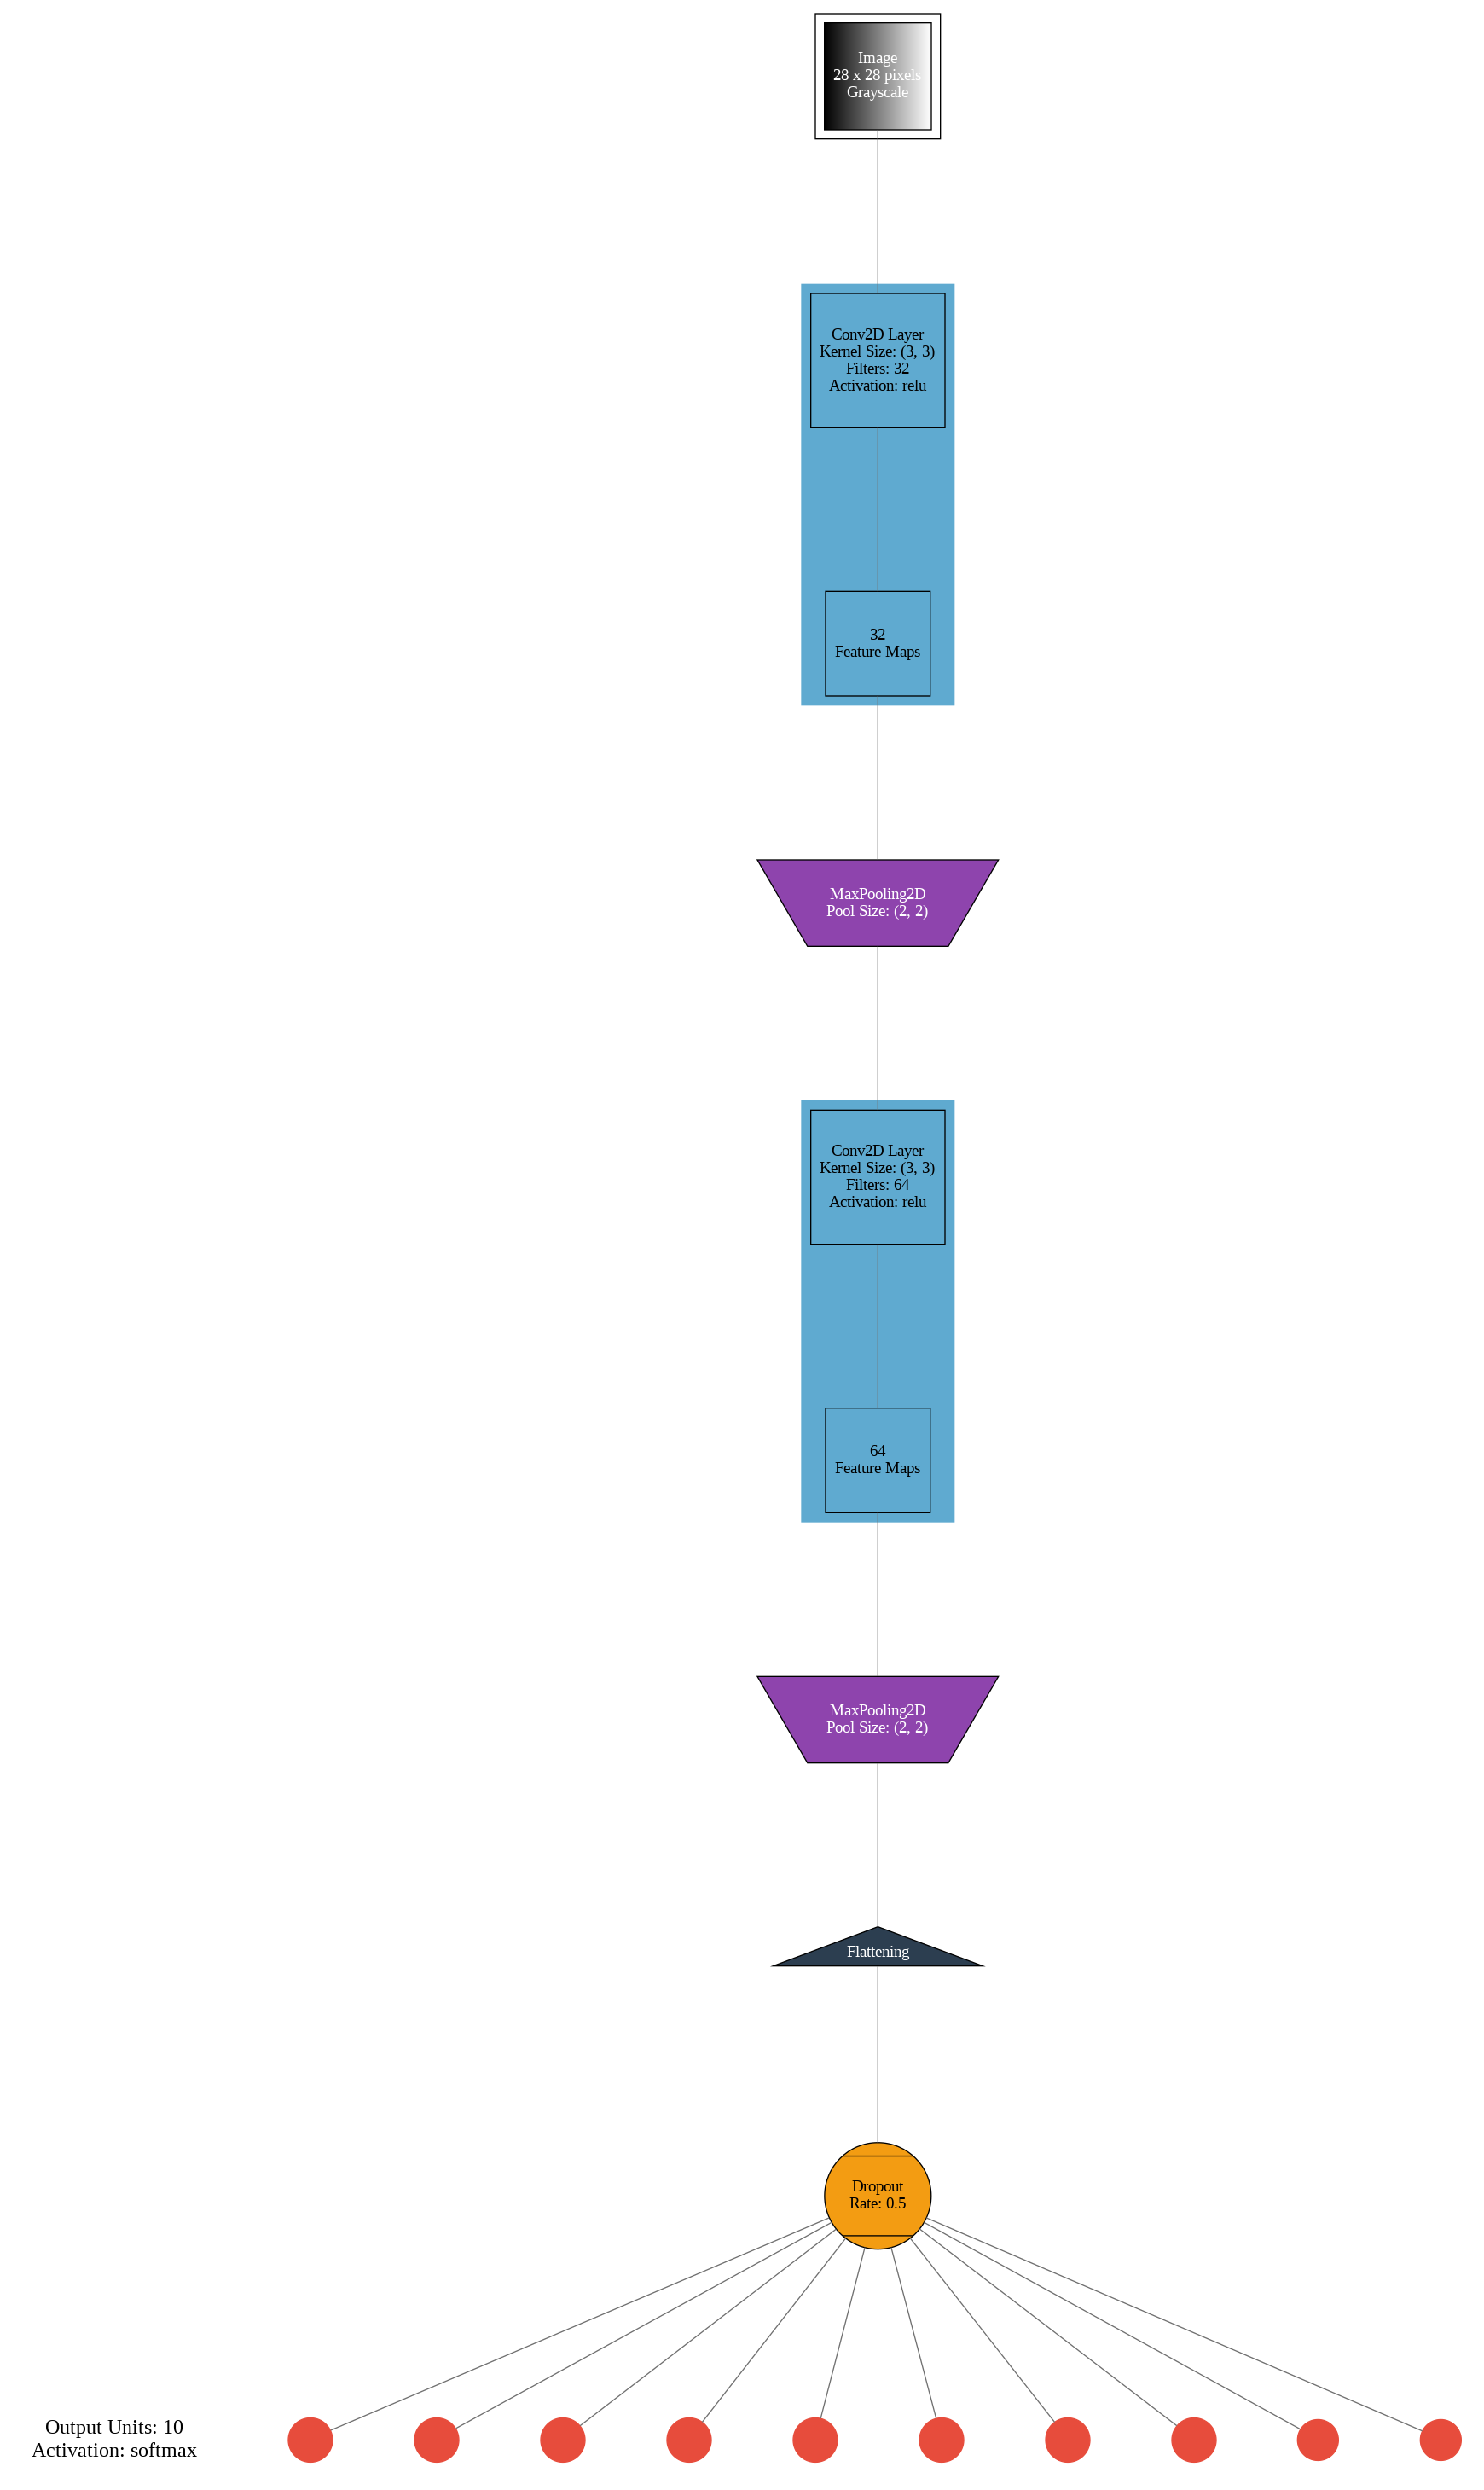

In [ ]:
visualizer(model, 
	file_name="model", 
	file_format='png')
Image("model.png")# Visualizing the network